In [1]:
from ND_north_star.src.utils.data_to_xarray import create_perlin_dataset, xarray_to_dict

In [2]:
resolution = 80
octave = 3
dimensions = [resolution, resolution]
boundary_points = 500

images = 50

combined_ds = create_perlin_dataset(images, dimensions=dimensions, octave=octave, random_num_samples=1000, boundary_points=boundary_points)

Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary 2: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary 0: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary -1: Not enough points to fit a spline.
Skipping boundary 6: Not enough p

In [3]:
print(combined_ds)

<xarray.Dataset>
Dimensions:         (image: 50, index: 6400, sampled_ind: 1000,
                     feature_ind: 6400, boundary_index: 500)
Coordinates:
  * feature_ind     (feature_ind) int32 0 1 2 3 4 5 ... 6395 6396 6397 6398 6399
    X0              (feature_ind) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    X1              (feature_ind) float64 0.0 0.01266 0.02532 ... 0.9873 1.0
  * boundary_index  (boundary_index) int32 0 1 2 3 4 5 ... 495 496 497 498 499
    X0_boundary     (image, boundary_index) float64 0.004883 0.00354 ... 0.3363
    X1_boundary     (image, boundary_index) float64 0.2481 0.2383 ... 0.9904 1.0
  * sampled_ind     (sampled_ind) int32 0 1 2 3 4 5 ... 994 995 996 997 998 999
    X0_sampled      (image, sampled_ind) float64 0.08861 0.3165 ... 0.5316
    X1_sampled      (image, sampled_ind) float64 0.1519 0.03797 ... 0.3291
  * image           (image) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49
Dimensions without coordinates: index
Data variables:
    v

In [10]:
data_image_0 = combined_ds.isel(image=12) #33,22,0

In [11]:
save_dict = xarray_to_dict(data_image_0)
print(save_dict.keys())

dict_keys(['features', 'features_sampled', 'values', 'values_sampled', 'resolution', 'octaves', 'boundary_splines', 'dimension'])


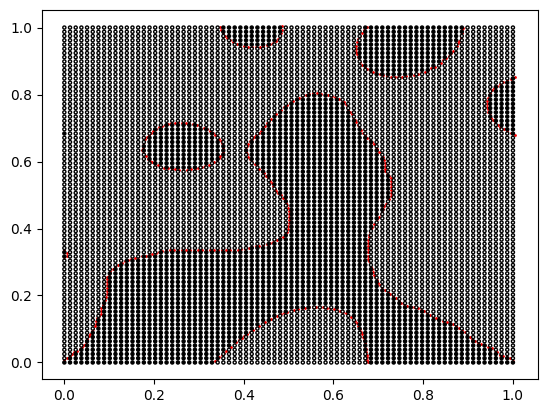

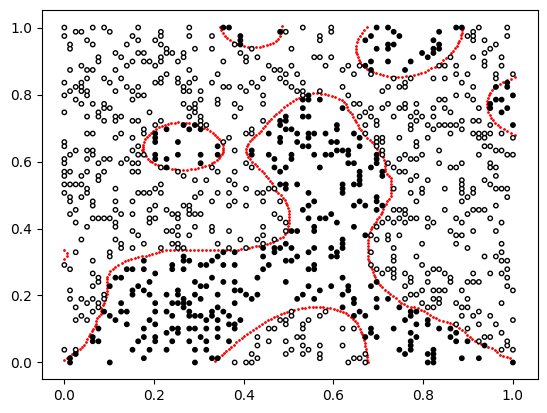

In [12]:
import matplotlib.pyplot as plt
import numpy as np

X0, X1, V = np.array(save_dict['features'])[:, 0], np.array(save_dict['features'])[:, 1], save_dict['values']
boundary_points = save_dict['boundary_splines']

plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=5, cmap='gray_r', edgecolors='black')
plt.show()

X0, X1, V = np.array(save_dict['features_sampled'])[:, 0], np.array(save_dict['features_sampled'])[:, 1], save_dict['values_sampled']
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=10, cmap='gray_r', edgecolors='black')
plt.show()

